In [26]:
import os
import time

from selenium import webdriver

import urllib.request

In [83]:
#Selenium code to scroll to bottom of the page

# search_query = "jindo+dog"
search_query = "neutral expression"

link = "https://www.google.com/search?q={}&tbm=isch".format(search_query)
DRIVER_PATH = '/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/Phase_5/chromedriver'

driver = webdriver.Chrome(executable_path=DRIVER_PATH)
driver.get(link)

SCROLL_PAUSE_TIME = 2

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    
    if new_height == last_height:
    #break #insert press load more
        try:
            element = driver.find_elements_by_class_name('mye4qd') #returns list
            element[0].click()
        except:
            break
    last_height = new_height
    
print("Reached the end of page")

<ipython-input-83-5afce488b39c>:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=DRIVER_PATH)
<ipython-input-83-5afce488b39c>:30: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  element = driver.find_elements_by_class_name('mye4qd') #returns list


Reached the end of page


In [84]:
def null_count(l):
    #given a list l, find the number of null
    null_count = 0
    
    for element in l:
        if element == None:
            null_count += 1
            
    return null_count

In [85]:
#return a list clickable objects for each individual image
image_links = driver.find_elements_by_class_name('rg_i.Q4LuWd')
total = len(image_links)
total

<ipython-input-85-a14bd7a903a2>:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  image_links = driver.find_elements_by_class_name('rg_i.Q4LuWd')


767

In [86]:
#use the list of object to search for 'data-src' and 'src' anchors
data_src_links = [image_links[i].get_attribute('data-src') for i in range(total)]
src_links = [image_links[i].get_attribute('src') for i in range(total)]

In [87]:
data_src_null_count = null_count(data_src_links)
data_src_null_count

537

In [88]:
src_null_count = null_count(src_links)
src_null_count

230

In [89]:
for i,element in enumerate(data_src_links):
    if element == None:
        data_src_links[i] = src_links[i]

In [90]:
"Nulls: {}, Length: {}".format(null_count(data_src_links), len(data_src_links))

'Nulls: 0, Length: 767'

In [91]:
os. chdir('/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/Phase_5/images/6')

In [92]:
!pwd

/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/Phase_5/images/6


In [93]:
for i,link in enumerate(data_src_links):
    

    name = 'neutral{}.png'.format(i)
    
    urllib.request.urlretrieve(link, name)
    time.sleep(1)

In [120]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [95]:
data = '/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/Phase_5/images'


In [96]:
data_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    data,
    target_size= (48,48),
    batch_size= 4043,
    class_mode= 'categorical')

Found 4035 images belonging to 7 classes.


In [97]:
data_images, data_labels = next(data_generator)

In [102]:
my_model = load_model('/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/Phase_5/final_model.h5')
my_model.load_weights('/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/Phase_5/final_model_weights.h5')

In [104]:
results = my_model.predict_classes(data_images)

In [131]:
print(results[30])

4


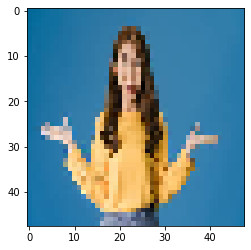

In [132]:
result_image = data_images[30]
display(plt.imshow(result_image))

In [135]:
acc = my_model.evaluate(data_images, data_labels, verbose=0)
print(acc)

[3.084678888320923, 0.15514250099658966]
